MovieWriter imagemagick unavailable; using Pillow instead.


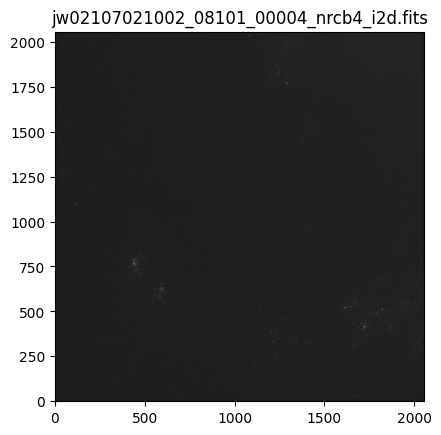

In [4]:
import os
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Image

# Directory containing FITS files
fits_dir = '../data/jwst_ngc_1365/i2d'

# Read all FITS files
fits_files = [f for f in os.listdir(fits_dir) if f.endswith('.fits')]
fits_data = [fits.getdata(os.path.join(fits_dir, f)) for f in fits_files]

# Create a figure for the animation
fig, ax = plt.subplots()

# Initialize the plot with the first frame
im = ax.imshow(fits_data[0], cmap='gray', origin='lower')

def update(frame):
    im.set_data(fits_data[frame])
    ax.set_title(fits_files[frame])
    return im,

# Create an animation
ani = FuncAnimation(fig, update, frames=len(fits_data), blit=True, repeat=False)

# Save as GIF
ani.save('animation.gif', writer='imagemagick')

# Display the GIF in the notebook
Image(url='animation.gif')


In [7]:
import os
import csv
from astropy.io import fits

# Directory containing FITS files
fits_dir = '../data/jwst_ngc_1365/i2d'

# CSV file to store selected header information
csv_file = 'fits_headers.csv'

# Read all FITS files
fits_files = [f for f in os.listdir(fits_dir) if f.endswith('.fits')]

# Define the keys of interest
keys_of_interest = ['DATE-OBS', 'TIME-OBS', 'DATE-BEG', 'DATE-END']

# Create a CSV file and write the selected header information
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write the header of the CSV file
    writer.writerow(['Filename'] + keys_of_interest)
    
    # Loop through each FITS file
    for fits_file in fits_files:
        # Open the FITS file and read the header
        with fits.open(os.path.join(fits_dir, fits_file)) as hdul:
            header = hdul[0].header  # Assuming the header is in the primary HDU
            
            # Extract the values for the keys of interest
            row = [fits_file] + [header.get(key, 'N/A') for key in keys_of_interest]
            
            # Write the row to the CSV file
            writer.writerow(row)


In [20]:
import numpy as np

f_2064_2058 = []
f_2058_2058 = []
for i, f in enumerate(fits_data):
    print(i, f.shape)
    if f.shape == (2064, 2058):
        f_2064_2058.append(f.copy())
    if f.shape == (2058, 2058):
        f_2058_2058.append(f.copy())


0 (2058, 2058)
1 (2064, 2058)
2 (2058, 2058)
3 (2064, 2058)
4 (2058, 2058)
5 (2064, 2058)
6 (2058, 2058)
7 (2064, 2058)
8 (2058, 2058)
9 (2064, 2058)
10 (2058, 2058)
11 (2064, 2058)
12 (2058, 2058)
13 (2064, 2058)
14 (2058, 2058)
15 (2064, 2058)
16 (2058, 2058)
17 (2064, 2058)
18 (2058, 2058)
19 (2064, 2058)
20 (2058, 2058)
21 (2064, 2058)
22 (2058, 2058)
23 (2064, 2058)
24 (2058, 2058)
25 (2064, 2058)
26 (2058, 2058)
27 (2064, 2058)
28 (2058, 2058)
29 (2064, 2058)
30 (2058, 2058)
31 (2058, 2058)
32 (2064, 2058)


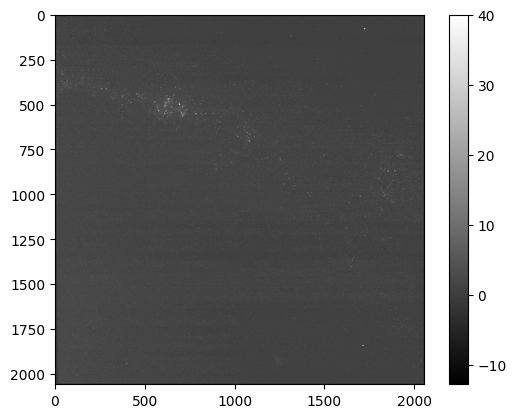

In [37]:
plt.imshow(f_2058_2058[0], cmap='gray', vmax = 40)
plt.colorbar()

C:\Users\sange\AppData\Local\Temp\ipykernel_13484\513106545.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.mean(np.array(f_2058_2058), axis=0)), cmap='gray', vmin=0)
C:\Users\sange\AppData\Local\Temp\ipykernel_13484\513106545.py:1: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(np.mean(np.array(f_2058_2058), axis=0)), cmap='gray', vmin=0)


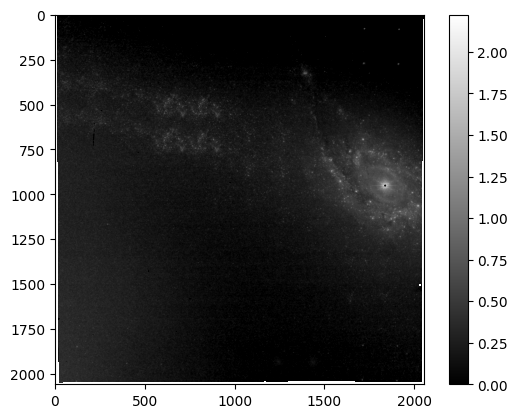

In [30]:
plt.imshow(np.log10(np.mean(np.array(f_2058_2058), axis=0)), cmap='gray', vmin=0)
plt.colorbar()

# mean is wrong as it is taking arms in some images

C:\Users\sange\AppData\Local\Temp\ipykernel_13484\536690866.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.mean(np.array(f_2064_2058), axis=0)), cmap='gray')
C:\Users\sange\AppData\Local\Temp\ipykernel_13484\536690866.py:1: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(np.mean(np.array(f_2064_2058), axis=0)), cmap='gray')


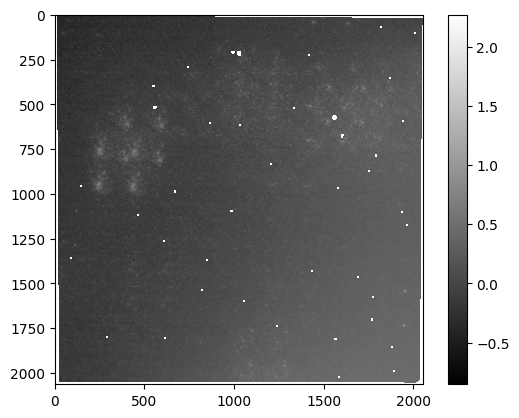

In [43]:
plt.imshow(np.log10(np.mean(np.array(f_2064_2058), axis=0)), cmap='gray')
plt.colorbar()

# mean is wrong as it is taking arms in some images

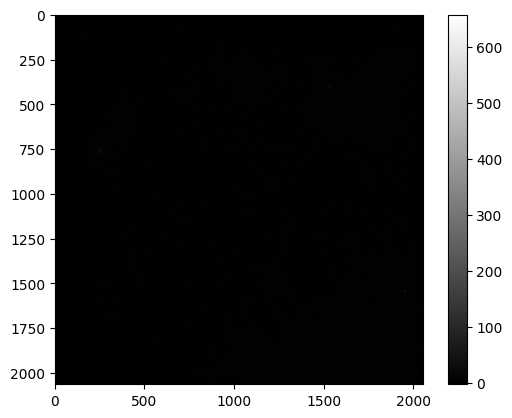

In [44]:
plt.imshow(np.array(f_2064_2058)[0], cmap='gray')
plt.colorbar()

In [50]:
import os
from astropy.io import fits
import astroalign as aa

# Directory containing FITS files
fits_dir = '../data/jwst_ngc_1365/i2d'
fits_dir_reg = '../data/jwst_ngc_1365/registered'

fits_files = [os.path.join(fits_dir, f) for f in os.listdir(fits_dir) if f.endswith('.fits')]

# Assuming the first image is the reference image
reference_image = fits.getdata(fits_files[0])

# Iterate over the FITS files and register them
for i, fits_file in enumerate(fits_files[1:], 1):  # Skip the first file
    # Read the FITS file
    target_image = fits.getdata(fits_file)

    try:
        # Register the target image to the reference image
        registered_image, footprint = aa.register(target_image, reference_image)

        # Save the registered image (modify the filename as needed)
        registered_filename = os.path.join(fits_dir_reg, f'registered_{i}.fits')
        fits.writeto(registered_filename, registered_image, overwrite=True)
    except Exception as e:
        print(f"Error registering image {fits_file}: {e}")

print("Image registration complete.")


Error registering image ../data/jwst_ngc_1365/i2d\jw02107021002_02101_00001_nrcb4_i2d.fits: List of matching triangles exhausted before an acceptable transformation was found
Error registering image ../data/jwst_ngc_1365/i2d\jw02107021002_02101_00002_nrcb2_i2d.fits: Big-endian buffer not supported on little-endian compiler
Error registering image ../data/jwst_ngc_1365/i2d\jw02107021002_02101_00002_nrcb4_i2d.fits: List of matching triangles exhausted before an acceptable transformation was found
Error registering image ../data/jwst_ngc_1365/i2d\jw02107021002_02101_00003_nrcb2_i2d.fits: Big-endian buffer not supported on little-endian compiler
Error registering image ../data/jwst_ngc_1365/i2d\jw02107021002_02101_00003_nrcb4_i2d.fits: List of matching triangles exhausted before an acceptable transformation was found
Error registering image ../data/jwst_ngc_1365/i2d\jw02107021002_02101_00004_nrcb2_i2d.fits: Big-endian buffer not supported on little-endian compiler
Error registering image .